In [107]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation, Conv2D, MaxPooling2D, ELU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [108]:
# Parameters
Num_Classes = 7
img_width, img_height = 48, 48
Batchsize = 64
epochs = 25
train_dir = r'train'
validation_dir = r'test'
Model_Name = "ModelFace_Expression_AI.h5"


In [109]:

# Data augmentation (realistic)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
valid_datagen = ImageDataGenerator(rescale=1./255)
# Data generators
train_gen = train_datagen.flow_from_directory(
    train_dir, color_mode='grayscale',
    target_size=(img_width, img_height),
    batch_size=Batchsize,
    class_mode='categorical',
    shuffle=True
)
valid_gen = valid_datagen.flow_from_directory(
    validation_dir, color_mode='grayscale',
    target_size=(img_width, img_height),
    batch_size=Batchsize,
    class_mode='categorical',
    shuffle=False
)
# Compute class weights
y_train = train_gen.classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))


Found 28731 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [110]:
# Model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal', input_shape=(img_width, img_height, 1)))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

c:\Users\Rohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [111]:
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


In [112]:
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

In [113]:
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

In [114]:
model.add(Flatten())
model.add(Dense(256, kernel_initializer='he_normal'))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [115]:
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [116]:
model.add(Dense(Num_Classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))
print(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_20 (ELU)                    │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_21 (ELU)                    │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_22 (ELU)                    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_23 (ELU)                    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_24 (ELU)                    │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_25 (ELU)                    │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_55          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 897,767 (3.42 MB)

 Trainable params: 895,719 (3.42 MB)

 Non-trainable params: 2,048 (8.00 KB)

None


In [117]:
# Compile
optimizer = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [118]:

# Callbacks
checkpoint = ModelCheckpoint(f"model//{Model_Name}", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-6)


callback = [checkpoint, earlystop, reduce_lr]

In [119]:
try:
    model.load_weights(f"Model\\{Model_Name}")
except Exception as e:
    print(f"{e},\n you dont have pretrained model : -> {Model_Name}\nStaring to train new model from scratch")

Shape mismatch in layer #12 (named conv2d_46)for weight sequential_5/conv2d_46/kernel. Weight expects shape (3, 3, 128, 128). Received saved weight with shape (3, 3, 128, 256),
 you dont have pretrained model : -> ModelFace_Expression_AI.h5
Staring to train new model from scratch


In [120]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    'balanced', 
    classes=np.unique(train_gen.classes),
    y=train_gen.classes
)
class_weights = dict(enumerate(class_weights))

In [121]:
# Train
history = model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // Batchsize,
    validation_data=valid_gen,
    validation_steps=valid_gen.samples // Batchsize,
    epochs=epochs,
    class_weight=class_weights,
    callbacks=callback
)

Epoch 1/25


c:\Users\Rohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.1575 - loss: 2.6445
Epoch 1: val_accuracy improved from -inf to 0.21429, saving model to model//ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 101s 216ms/step - accuracy: 0.1575 - loss: 2.6442 - val_accuracy: 0.2143 - val_loss: 2.0121 - learning_rate: 5.0000e-04
Epoch 2/25
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:38 221ms/step - accuracy: 0.1719 - loss: 2.0309

c:\Users\Rohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.21429
448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1719 - loss: 2.0309 - val_accuracy: 0.2119 - val_loss: 2.0394 - learning_rate: 5.0000e-04
Epoch 3/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.1792 - loss: 2.1357
Epoch 3: val_accuracy improved from 0.21429 to 0.26088, saving model to model//ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 98s 217ms/step - accuracy: 0.1792 - loss: 2.1357 - val_accuracy: 0.2609 - val_loss: 1.8641 - learning_rate: 5.0000e-04
Epoch 4/25
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:34 212ms/step - accuracy: 0.2031 - loss: 1.9676
Epoch 4: val_accuracy did not improve from 0.26088
448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.2031 - loss: 1.9676 - val_accuracy: 0.2574 - val_loss: 1.8885 - learning_rate: 5.0000e-04
Epoch 5/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2043 - loss: 1.9618
Epoch 5: val_accuracy improved from 0.26088 to 0.26297, saving model to model//ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 690s 2s/step - accuracy: 0.2043 - loss: 1.9618 - val_accuracy: 0.2630 - val_loss: 1.7755 - learning_rate: 5.0000e-04
Epoch 6/25
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:35 213ms/step - accuracy: 0.1875 - loss: 1.6049
Epoch 6: val_accuracy improved from 0.26297 to 0.26437, saving model to model//ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1875 - loss: 1.6049 - val_accuracy: 0.2644 - val_loss: 1.7746 - learning_rate: 5.0000e-04
Epoch 7/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.2286 - loss: 1.8501
Epoch 7: val_accuracy improved from 0.26437 to 0.28599, saving model to model//ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 119s 265ms/step - accuracy: 0.2286 - loss: 1.8501 - val_accuracy: 0.2860 - val_loss: 1.7714 - learning_rate: 5.0000e-04
Epoch 8/25
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:47 241ms/step - accuracy: 0.2344 - loss: 2.1428
Epoch 8: val_accuracy improved from 0.28599 to 0.29004, saving model to model//ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.2344 - loss: 2.1428 - val_accuracy: 0.2900 - val_loss: 1.7567 - learning_rate: 5.0000e-04
Epoch 9/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.2589 - loss: 1.7819
Epoch 9: val_accuracy improved from 0.29004 to 0.37835, saving model to model//ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 96s 215ms/step - accuracy: 0.2589 - loss: 1.7819 - val_accuracy: 0.3783 - val_loss: 1.5973 - learning_rate: 5.0000e-04
Epoch 10/25
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:30 203ms/step - accuracy: 0.1875 - loss: 2.3162
Epoch 10: val_accuracy did not improve from 0.37835
448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1875 - loss: 2.3162 - val_accuracy: 0.3739 - val_loss: 1.6033 - learning_rate: 5.0000e-04
Epoch 11/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.2970 - loss: 1.7351
Epoch 11: val_accuracy did not improve from 0.37835
448/448 ━━━━━━━━━━━━━━━━━━━━ 97s 217ms/step - accuracy: 0.2971 - loss: 1.7350 - val_accuracy: 0.3756 - val_loss: 1.5995 - learning_rate: 5.0000e-04
Epoch 12/25
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:31 204ms/step - accuracy: 0.3125 - loss: 1.5182
Epoch 12: val_accuracy did not improve from 0.37835

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy

448/448 ━━━━━━━━━━━━━━━━━━━━ 92s 206ms/step - accuracy: 0.3470 - loss: 1.6283 - val_accuracy: 0.4136 - val_loss: 1.5060 - learning_rate: 1.0000e-04
Epoch 14/25
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:31 204ms/step - accuracy: 0.3438 - loss: 2.2975
Epoch 14: val_accuracy improved from 0.41364 to 0.41462, saving model to model//ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3438 - loss: 2.2975 - val_accuracy: 0.4146 - val_loss: 1.5055 - learning_rate: 1.0000e-04
Epoch 15/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.3683 - loss: 1.5960
Epoch 15: val_accuracy did not improve from 0.41462
448/448 ━━━━━━━━━━━━━━━━━━━━ 96s 213ms/step - accuracy: 0.3683 - loss: 1.5960 - val_accuracy: 0.4086 - val_loss: 1.5280 - learning_rate: 1.0000e-04
Epoch 16/25
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:28 197ms/step - accuracy: 0.2969 - loss: 1.4091
Epoch 16: val_accuracy did not improve from 0.41462
448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.2969 - loss: 1.4091 - val_accuracy: 0.4096 - val_loss: 1.5289 - learning_rate: 1.0000e-04
Epoch 17/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.3712 - loss: 1.5806
Epoch 17: val_accuracy improved from 0.41462 to 0.43666, saving model to model//ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 111s 247ms/step - accuracy: 0.3712 - loss: 1.5806 - val_accuracy: 0.4367 - val_loss: 1.4665 - learning_rate: 1.0000e-04
Epoch 18/25
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:47 240ms/step - accuracy: 0.4219 - loss: 1.7482
Epoch 18: val_accuracy did not improve from 0.43666
448/448 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.4219 - loss: 1.7482 - val_accuracy: 0.4362 - val_loss: 1.4690 - learning_rate: 1.0000e-04
Epoch 19/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 972ms/step - accuracy: 0.3801 - loss: 1.5641
Epoch 19: val_accuracy did not improve from 0.43666
448/448 ━━━━━━━━━━━━━━━━━━━━ 544s 1s/step - accuracy: 0.3801 - loss: 1.5641 - val_accuracy: 0.4251 - val_loss: 1.4894 - learning_rate: 1.0000e-04
Epoch 20/25
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:34 211ms/step - accuracy: 0.2969 - loss: 1.4176
Epoch 20: val_accuracy did not improve from 0.43666

Epoch 20: ReduceLROnPlateau reducing learning rate to 2.0000000949949027e-05.
448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy:

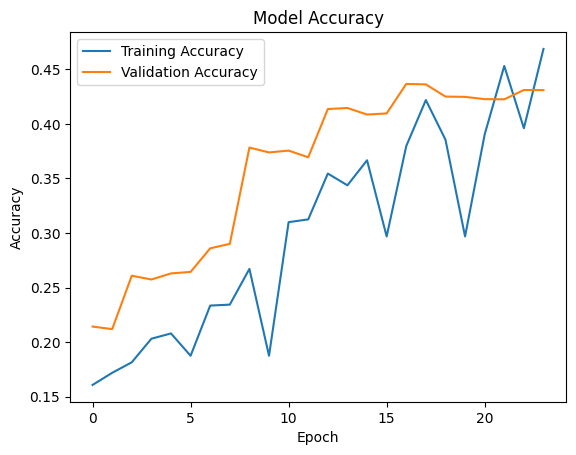

In [122]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


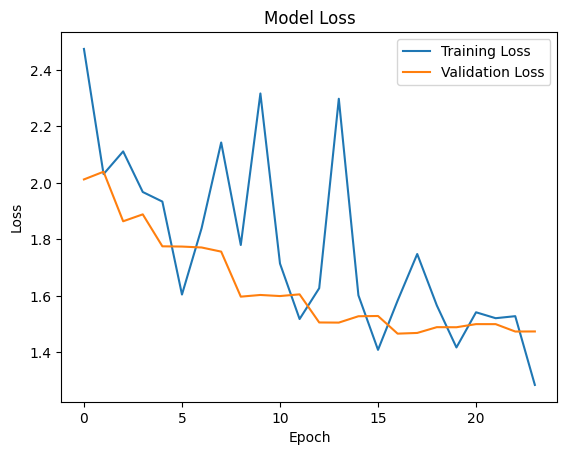

In [123]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step


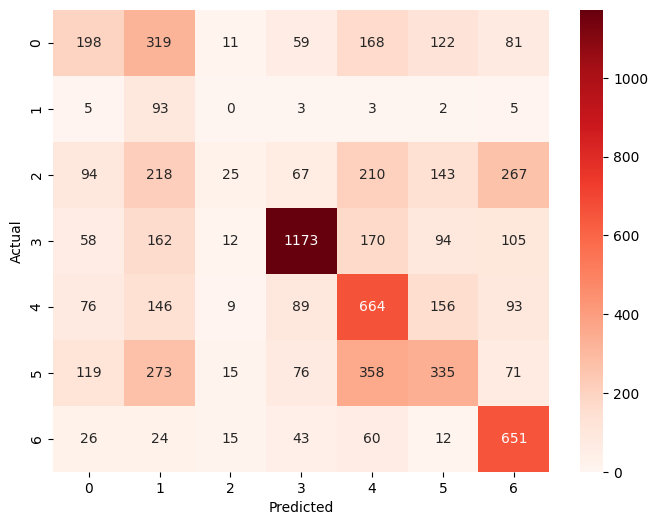

In [124]:

# Confusion Matrix on Validation Set
y_pred = model.predict(valid_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(valid_gen.classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [127]:
from sklearn.metrics import classification_report
print(classification_report(valid_gen.classes, y_pred_classes, target_names=list(valid_gen.class_indices.keys())))

              precision    recall  f1-score   support

       angry       0.34      0.21      0.26       958
     disgust       0.08      0.84      0.14       111
        fear       0.29      0.02      0.05      1024
       happy       0.78      0.66      0.71      1774
     neutral       0.41      0.54      0.46      1233
         sad       0.39      0.27      0.32      1247
    surprise       0.51      0.78      0.62       831

    accuracy                           0.44      7178
   macro avg       0.40      0.47      0.37      7178
weighted avg       0.48      0.44      0.43      7178

